# Question 7

This script implements the Good-Thomas (Prime Factor) FFT algorithm and compares its performance to the Cooley-Tukey algorithm from Question 6.

In [1]:
from pathlib import Path

import numpy as np
import scipy.fft as fft

import matplotlib.pyplot as plt
import seaborn as sns

from a3_config import A3_ROOT, SAVEFIG_CONFIG

In [8]:
# Import signal from Question 6
x_signal = np.load(Path(A3_ROOT, "output", "q6_signal_out.npy"))

### Good-Thomas FFT

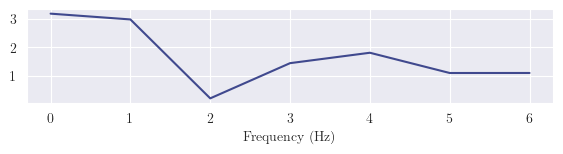

In [9]:
from typing import Any

def good_thomas(x: Any, radix: int = 3) -> Any:
    """Compute the 1-D discrete Fourier transform using the Good-Thomas FFT."""
    if (n := len(x)) % radix != 0:
        raise ValueError(f'input length must be multiple of radix')
    n_rows = radix
    n_cols = int(n / radix)
    # Define DFT operation
    X = lambda x, k, n: sum(x[i] * np.exp(-2 * np.pi * 1j * i * k / n) for i in range(n))
    # Load input into matrix along extended diagonal
    x_mat = np.empty((n_rows, n_cols), dtype=np.complex128)
    for p in range(n):
        x_mat[p % n_rows, p % n_cols] = x[p]
    # 2D transform
    x_dft = np.array([[X(x_mat[:, j], k, n_rows) for k in range(n_rows)] for j in range(n_cols)]).T
    x_dft = np.array([[X(x_dft[i, :], k, n_cols) for k in range(n_cols)] for i in range(n_rows)])
    # Reorganise matrix back into vector
    x_out = np.empty(n, dtype=np.complex128)
    for i in range(n_rows):
        for j in range(n_cols):
            x_out[(i * n_cols + j * n_rows) % n] = x_dft[i, j]

    return x_out

h_signal = good_thomas(x_signal, radix=3)[:7]
f_signal = fft.fftfreq(15, 1/15)[:7]

# Plot signal and its DFT
fig, ax = plt.subplots(figsize=(6, 1.5))
fig.tight_layout()

sns.lineplot(x=f_signal, y=np.abs(h_signal), ax=ax)
ax.set_xlabel("Frequency (Hz)")

# fname = Path(A3_ROOT, "output", "q7_good_thomas.png")
# fig.savefig(fname, **SAVEFIG_CONFIG)
plt.show()

### Performance Comparison

In [10]:
import time
from tqdm import trange

N_TRIALS = 10000

time_start = time.time()
for _ in trange(N_TRIALS):
    h_signal = good_thomas(x_signal, radix=3)

time_elapsed = time.time() - time_start
print(f'Good-Thomas FFT ({N_TRIALS} trials): {time_elapsed * 1000 / N_TRIALS:.5f} ms')

100%|██████████| 10000/10000 [00:02<00:00, 4465.46it/s]

Good-Thomas FFT (10000 trials): 0.22478 ms
